In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from scipy import stats
from scipy.stats import pearsonr
from timeit import default_timer
from sklearn.model_selection import train_test_split

In [3]:

tag = pd.read_csv("C:/Users/HP/Downloads/archive/tag.csv")
movie = pd.read_csv("C:/Users/HP/Downloads/archive/movie.csv")
link = pd.read_csv("C:/Users/HP/Downloads/archive/link.csv")
genome_tags = pd.read_csv("C:/Users/HP/Downloads/archive/genome_tags.csv")
genome_scores = pd.read_csv("C:/Users/HP/Downloads/archive/genome_scores.csv")

tag.head(20)

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18
5,65,668,bollywood,2013-05-10 01:37:56
6,65,898,screwball comedy,2013-05-10 01:42:40
7,65,1248,noir thriller,2013-05-10 01:39:43
8,65,1391,mars,2013-05-10 01:40:55
9,65,1617,neo-noir,2013-05-10 01:43:37


In [40]:
tag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465564 entries, 0 to 465563
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   userId     465564 non-null  int64 
 1   movieId    465564 non-null  int64 
 2   tag        465548 non-null  object
 3   timestamp  465564 non-null  object
dtypes: int64(2), object(2)
memory usage: 14.2+ MB


In [80]:
tag["tag"].unique()

array(['Mark Waters', 'dark hero', 'noir thriller', ..., 'circle k',
       'This movie should have been called \\\\"How Cocaine Ruined Disney\\"\\""',
       'topless scene'], dtype=object)

In [81]:
tag["userId"].unique()

array([    18,     65,     96, ..., 138437, 138446, 138472], dtype=int64)

In [82]:
tag["movieId"].unique()

array([  4141,    208,    353, ..., 113539, 115373,   1495], dtype=int64)

In [83]:
tag["timestamp"].unique()

array(['2009-04-24 18:19:40', '2013-05-10 01:41:18',
       '2013-05-10 01:41:19', ..., '2013-01-23 23:29:32',
       '2013-01-23 23:29:38', '2007-11-02 21:12:47'], dtype=object)

In [84]:
tag.isnull().sum()

userId        0
movieId       0
tag          16
timestamp     0
dtype: int64

In [85]:
tag.shape

(465564, 4)

In [87]:
tag.dtypes

userId        int64
movieId       int64
tag          object
timestamp    object
dtype: object

In [86]:
movie.head(20)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [88]:
movie.describe()

,movieId
count,27278.00000
mean,59855.48057
std,44429.31470
min,1.00000
25%,6931.25000
50%,68068.00000
75%,100293.25000
max,131262.00000


In [89]:
movie.info

<bound method DataFrame.info of        movieId                               title  \
0            1                    Toy Story (1995)   
1            2                      Jumanji (1995)   
2            3             Grumpier Old Men (1995)   
3            4            Waiting to Exhale (1995)   
4            5  Father of the Bride Part II (1995)   
...        ...                                 ...   
27273   131254        Kein Bund für's Leben (2007)   
27274   131256       Feuer, Eis & Dosenbier (2002)   
27275   131258                  The Pirates (2014)   
27276   131260                 Rentun Ruusu (2001)   
27277   131262                    Innocence (2014)   

                                            genres  
0      Adventure|Animation|Children|Comedy|Fantasy  
1                       Adventure|Children|Fantasy  
2                                   Comedy|Romance  
3                             Comedy|Drama|Romance  
4                                           Comedy  
.

In [90]:
movie["genres"].unique()

array(['Adventure|Animation|Children|Comedy|Fantasy',
       'Adventure|Children|Fantasy', 'Comedy|Romance', ...,
       'Action|Adventure|Animation|Fantasy|Horror',
       'Animation|Children|Comedy|Fantasy|Sci-Fi',
       'Animation|Children|Comedy|Western'], dtype=object)

In [78]:
movie["title"].unique()

array(['Toy Story (1995)', 'Jumanji (1995)', 'Grumpier Old Men (1995)',
       ..., 'The Pirates (2014)', 'Rentun Ruusu (2001)',
       'Innocence (2014)'], dtype=object)

In [77]:
movie.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [76]:
movie.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

In [75]:
movie.dtypes

movieId     int64
title      object
genres     object
dtype: object

In [74]:
link.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  27278 non-null  int64  
 1   imdbId   27278 non-null  int64  
 2   tmdbId   27026 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 639.5 KB


In [73]:
link.describe()

,movieId,imdbId,tmdbId
count,27278.00000,27278.00000,27026.00000
mean,59855.48057,578185.96466,63846.68308
std,44429.31470,780470.68131,69862.13450
min,1.00000,5.00000,2.00000
25%,6931.25000,77417.25000,15936.50000
50%,68068.00000,152435.00000,39468.50000
75%,100293.25000,906271.50000,82504.00000
max,131262.00000,4530184.00000,421510.00000


In [72]:
link.shape

(27278, 3)

In [71]:
genome_tags.head(20)

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s
5,6,1950s
6,7,1960s
7,8,1970s
8,9,1980s
9,10,19th century


In [70]:
genome_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   1128 non-null   int64 
 1   tag     1128 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.8+ KB


In [69]:
genome_tags["tag"].unique()

array(['007', '007 (series)', '18th century', ..., 'wwii', 'zombie',
       'zombies'], dtype=object)

In [68]:
genome_tags.shape

(1128, 2)

In [67]:
genome_scores.head(20)

,movieId,tagId,relevance
0,1,1,0.02500
1,1,2,0.02500
2,1,3,0.05775
3,1,4,0.09675
4,1,5,0.14675
5,1,6,0.21700
6,1,7,0.06700
7,1,8,0.26275
8,1,9,0.26200
9,1,10,0.03200


In [66]:
genome_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11709768 entries, 0 to 11709767
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   relevance  float64
dtypes: float64(1), int64(2)
memory usage: 268.0 MB


In [65]:
genome_scores.describe()

,movieId,tagId,relevance
count,11709768.00000,11709768.00000,11709768.00000
mean,25842.96580,564.50000,0.11648
std,34676.15200,325.62544,0.15425
min,1.00000,1.00000,0.00025
25%,2926.00000,282.75000,0.02425
50%,6017.00000,564.50000,0.05650
75%,46062.00000,846.25000,0.14150
max,131170.00000,1128.00000,1.00000


In [64]:
genome_scores["movieId"].unique()

array([     1,      2,      3, ..., 131013, 131168, 131170], dtype=int64)

In [63]:
genome_scores["relevance"].unique()

array([2.5000e-02, 5.7750e-02, 9.6750e-02, ..., 8.9250e-01, 9.2775e-01,
       2.5000e-04])

In [41]:
import pandas as pd
rating = pd.read_csv("C:/Users/HP/Downloads/archive/rating.csv")
rating.head(20)

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40
5,1,112,3.5,2004-09-10 03:09:00
6,1,151,4.0,2004-09-10 03:08:54
7,1,223,4.0,2005-04-02 23:46:13
8,1,253,4.0,2005-04-02 23:35:40
9,1,260,4.0,2005-04-02 23:33:46


In [11]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 610.4+ MB


In [41]:
data.describe()

AttributeError: 'numpy.ndarray' object has no attribute 'describe'

In [15]:
data.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

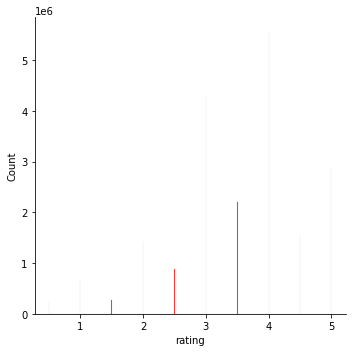

In [46]:
sns.displot(data.rating, color='red')

In [50]:
corr_mat_rating = data.corr()
corr_mat_rating

plt.figure(figsize=(10,8))
plot = sns

,userId,movieId,rating
userId,1.00000,-0.00085,0.00118
movieId,-0.00085,1.00000,0.00261
rating,0.00118,0.00261,1.00000


Text(0.5, 1.0, 'Rating Heat Map')

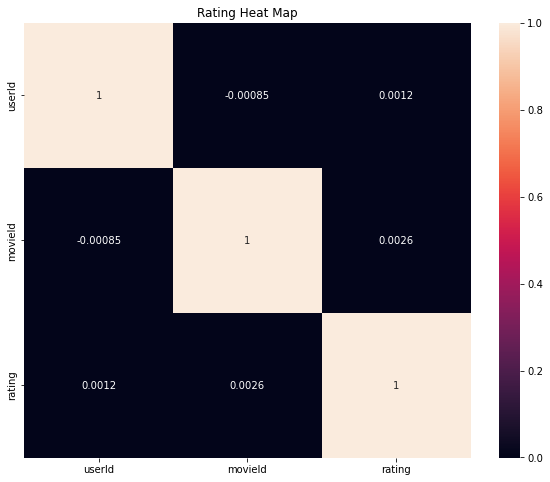

In [57]:
plt.figure(figsize=(10,8))
plot = sns.heatmap(data.corr().round(5), annot = True)
plot.set_title("Rating Heat Map")

In [98]:
st = default_timer()

#First_time_data_load
movie = pd.read_csv('C:/Users/HP/Downloads/archive/movie.csv')
rating = pd.read_csv('C:/Users/HP/Downloads/archive/rating.csv')
    
# Organise a bit and store into feather-format
movie.sort_values(by='movieId', inplace=True)
movie.reset_index(inplace=True, drop=True)
rating.sort_values(by='movieId', inplace=True)
rating.reset_index(inplace=True, drop=True)

print(rating.dtypes)

# Split title and release year in separate columns in movies dataframe. Convert year to timestamp.
movie['year'] = movie.title.str.extract("\((\d{4})\)", expand=True)
movie.year = pd.to_datetime(movie.year, format='%Y')
movie.year = movie.year.dt.year # As there are some NaN years, resulting type will be float (decimals)
movie.title = movie.title.str[:-7]

# Categorize movies genres properly
genres_unique = pd.DataFrame(movie.genres.str.split('|').tolist()).stack().unique()
genres_unique = pd.DataFrame(genres_unique, columns=['genre']) # Format into DataFrame to store later
movie = movie.join(movie.genres.str.get_dummies().astype(bool))
movie.drop('genres', inplace=True, axis=1)

# Modify rating timestamp format (from seconds to datetime year)
#ratings.timestamp = pd.to_datetime(ratings.timestamp, unit='s')
rating.timestamp = pd.to_datetime(rating.timestamp, infer_datetime_format=True)
rating.timestamp = rating.timestamp.dt.year

# Check and clean NaN values
print ("Number of movies Null values: ", max(movie.isnull().sum()))
print ("Number of ratings Null values: ", max(rating.isnull().sum()))
movie.dropna(inplace=True)
rating.dropna(inplace=True)
    
# Organise a bit, then save into feather-formatand clear from memory
movie.sort_values(by='movieId', inplace=True)
rating.sort_values(by='movieId', inplace=True)
movie.reset_index(inplace=True, drop=True)
rating.reset_index(inplace=True, drop=True)

   
runtime = default_timer() - st
print ("Elapsed time(sec): ", round(runtime,2))


userId         int64
movieId        int64
rating       float64
timestamp     object
dtype: object
Number of movies Null values:  22
Number of ratings Null values:  0
Elapsed time(sec):  43.5


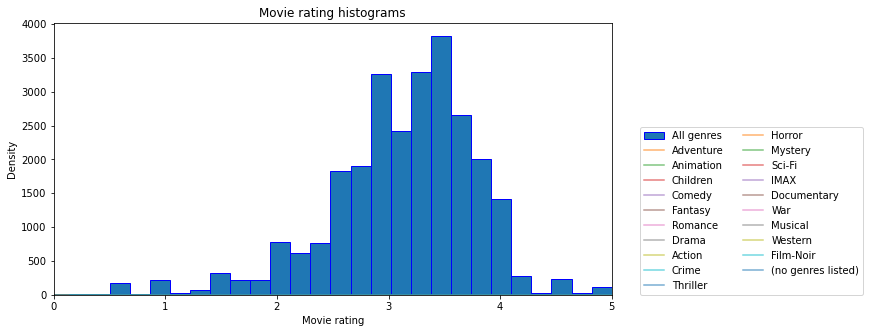

In [107]:
st = default_timer()

dftmp = rating[['movieId','rating']].groupby('movieId').mean()

# Initialize empty list to capture basic stats by genre
rating_stats = []
# Plot general histogram of all ratings
dftmp.hist(bins=25, grid=False, edgecolor='b', label ='All genres', figsize=(10,5))
# Plot histograms per genre
for genre in genres_unique.genre:
    dftmp = movie[movie[genre]==True]
    dftmp = rating[rating.set_index('movieId').index.isin(dftmp.set_index('movieId').index)]
    dftmp = dftmp[['movieId','rating']].groupby('movieId').mean()
    dftmp.rating.plot(grid=False, alpha=0.6, kind='kde', label=genre)
    avg = dftmp.rating.mean()
    std = dftmp.rating.std()
    rating_stats.append((genre, avg, std))
plt.legend(loc=(1.05,0), ncol=2)
plt.xlim(0,5)
plt.xlabel('Movie rating')
plt.title('Movie rating histograms')
plt.show()

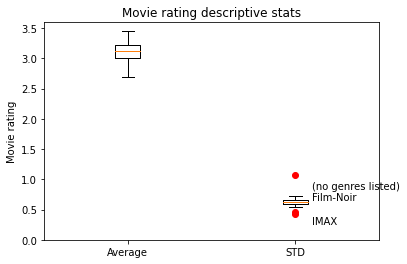

Outliers:  {'Film-Noir', '(no genres listed)', 'IMAX'}
genre    Adventure  Animation  Children  Comedy  Fantasy  Romance   Drama  \
average    3.07241    3.17710   2.95561 3.07427  3.09308  3.20574 3.26206   
std_dev    0.65882    0.65273   0.71140 0.64896  0.66196  0.58383 0.58113   

genre    Action   Crime  Thriller  Horror  Mystery  Sci-Fi    IMAX  \
average 2.97683 3.16685   3.01607 2.69680  3.13500 2.88951 3.29467   
std_dev 0.66590 0.58460   0.64360 0.72049  0.59328 0.72031 0.42390   

genre    Documentary     War  Musical  Western  Film-Noir  (no genres listed)  
average      3.43663 3.32114  3.18083  3.07523    3.44415             2.77153  
std_dev      0.62191 0.54391  0.58997  0.61373    0.46308             1.07136  


In [115]:
st = default_timer()

# Construct a DataFrame with all the basic stats per genre
rating_sum = pd.DataFrame(rating_stats,  columns=['genre', 'average', 'std_dev'])
rating_sum.set_index('genre', inplace=True)
# Display a boxplot to show the dispersion of average and standard deviation
bxplot = plt.boxplot(rating_sum, labels=['Average', 'STD'], sym="ro")
# Properly label the outliers
outliers = []
for i, value in enumerate(bxplot['fliers']):
    for val in value.get_ydata():
        bxplot_label = rating_sum.index[rating_sum.iloc[:, i] == val][0]
        outliers.append(bxplot_label)
        plt.annotate(bxplot_label, xy=(i+1.1, val+np.random.uniform(-0.25,0.25))) # Trick to prevent overlapping
outliers = set(outliers)
plt.ylim(0,)
plt.ylabel('Movie rating')
plt.title('Movie rating descriptive stats')
plt.show()


print("Outliers: ", outliers)
print(rating_sum.T)


In [33]:
data = np.random.rand(100, 10)
train, test = train_test_split(data,  test_size=0.15, random_state =42)

In [34]:
len(train)

85

In [36]:
len(test)

15

In [12]:
x = movie
x

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)


In [4]:
rating = pd.read_csv("C:/Users/HP/Downloads/archive/rating.csv")
y = rating
y

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40
...,...,...,...,...
20000258,138493,68954,4.5,2009-11-13 15:42:00
20000259,138493,69526,4.5,2009-12-03 18:31:48
20000260,138493,69644,3.0,2009-12-07 18:10:57
20000261,138493,70286,5.0,2009-11-13 15:42:24


In [46]:
train2, val = train_test_split(data, test_size =0.2)

In [47]:
len(train2)

80

In [48]:
len(val)

20

In [5]:
y = rating

In [19]:
from sklearn.model_selection import GroupKFold

x 
y 
groups = [1, 1, 1, 2, 2, 2, 3, 3, 3, 3]

gkf = GroupKFold(n_splits=3)
for train, test in gkf.split(x, y, groups=groups):
 print("%s %s" % (train, test))

ValueError: Found input variables with inconsistent numbers of samples: [27278, 20000263, 10]